In [9]:
'''
Before starting, I want to thank Sreenivas Bhattiprolu with Python for Microscopists 
for his assistance with learning this topic.

Dataset: https://www.kaggle.com/studymart/profit-prediction-using-linear-regression
'''

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import metrics

data = pd.read_csv("~/Desktop/Sklearn Data Sets/ProfitPredictionLinearRegression/PredictProfit.csv")

print(data.info(),"\n")
print(data.head(),"\n")

LR = LinearRegression().fit(data[['Marketing Spend', 'Administration', 'Transport']], data.Profit)
print("\n",LR)

print("\n\n", LR.coef_)
x,y,z=LR.coef_
print("\n\n")
print("x:", x)
print("y:", y)
print("z:", z)

print("\n\n", LR.intercept_)

print("\n\nThe equation as a result of this regression test is:")
print("result = ",x,"(Marketing Spend) + ",y,"(Administration) + ",z,"(Transport) + ",LR.intercept_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None 

   Marketing Spend  Administration  Transport     Area     Profit
0        114523.61       136897.80  471784.10    Dhaka  192261.83
1        162597.70       151377.59  443898.53      Ctg  191792.06
2        153441.51       101145.55  407934.54  Rangpur  191050.39
3        144372.41       118671.85  383199.62    Dhaka  182901.99
4        142107.34        91391.77  366168.42  Rangpur  166187.94 


 LinearRegression()


 [0.69400705 0.03630713 0.06816975]



x: 0.694007054538796
y: 0.036307129682480926
z: 0.0681697

In [10]:
'''predict for a set of values:
Marketing Spend: 100,000
Administration: 50,000
Transport: 25,000
'''

prediction_values=[100000, 50000, 25000]

LR.predict([[100000,50000,25000]])[0]

114978.42058652279

In [11]:
#score it
LR.score(data[['Marketing Spend', 'Administration', 'Transport']], data.Profit) #(x, y)

0.9010441949658275

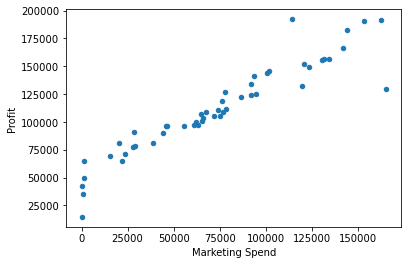

In [12]:
'''
Since the Marketing Spend has far and away the biggest impact on Profit, I am going to run a Linear Regression on it.
'''

data.plot(kind="scatter", x='Marketing Spend', y='Profit')
plt.show()

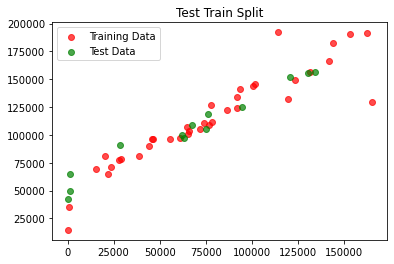

In [13]:
X_train, X_test, y_train, y_test=train_test_split(data['Marketing Spend'], data.Profit)
#print(X_train)
#print(X_test)
#print(y_train)
#print(y_test)
plt.scatter(X_train, y_train, label="Training Data", color='r', alpha=.7)
plt.scatter(X_test, y_test, label="Test Data", color='g', alpha=.7)
plt.legend()
plt.title("Test Train Split")
plt.show()

In [14]:
LR2 = LinearRegression()
LR2.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

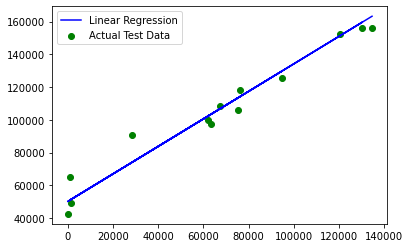


The R^2 score is:  0.9566366494349613 

The prediction of 100,000 in marketing spend results in a profit of 134151.76182077246 

0.8400305495521538
50148.70686555708


In [15]:
prediction = LR2.predict(X_test.values.reshape(-1,1))

plt.plot(X_test, prediction, label="Linear Regression", color="b" )
plt.scatter(X_test, y_test, label="Actual Test Data", color="g")
plt.legend()
plt.show()

print("\nThe R^2 score is: ", LR2.score(X_test.values.reshape(-1,1), y_test.values),"\n")
print("The prediction of 100,000 in marketing spend results in a profit of", LR2.predict(np.array([[100000]]))[0],"\n")
print(LR2.coef_[0])
print(LR2.intercept_)

In [22]:
# Metrics

print(metrics.mean_absolute_error(y_test.values.reshape(-1,1), prediction))
print(metrics.mean_squared_error(y_test.values.reshape(-1,1), prediction))
print(metrics.median_absolute_error(y_test.values.reshape(-1,1), prediction))


5993.75871049632
56379074.33540178
4293.242999403243
